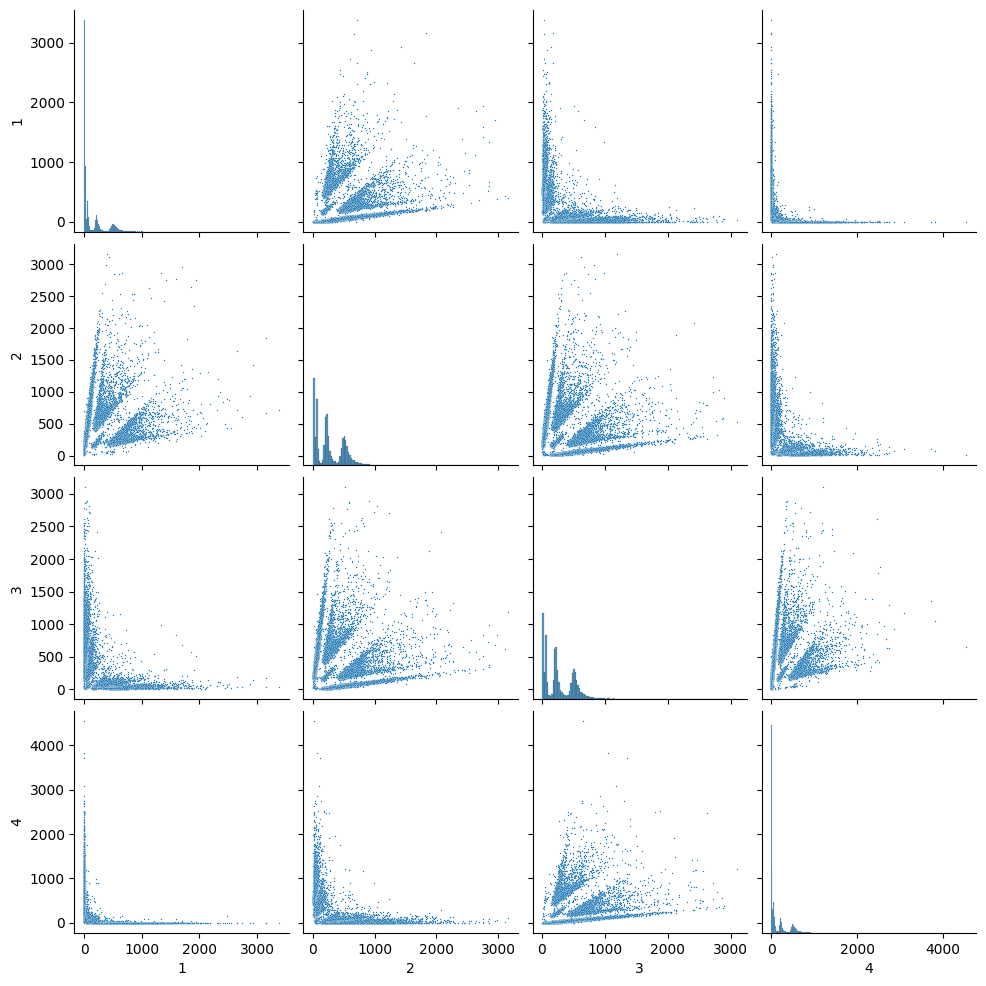

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

public = pd.read_csv('/kaggle/input/final1/public_data.csv')
private = pd.read_csv('/kaggle/input/final1/private_data.csv')

X_public = public.drop(columns=["id"])
X_private = private.drop(columns=["id"])

sns.pairplot(X_public, plot_kws={'s': 1})
plt.show()

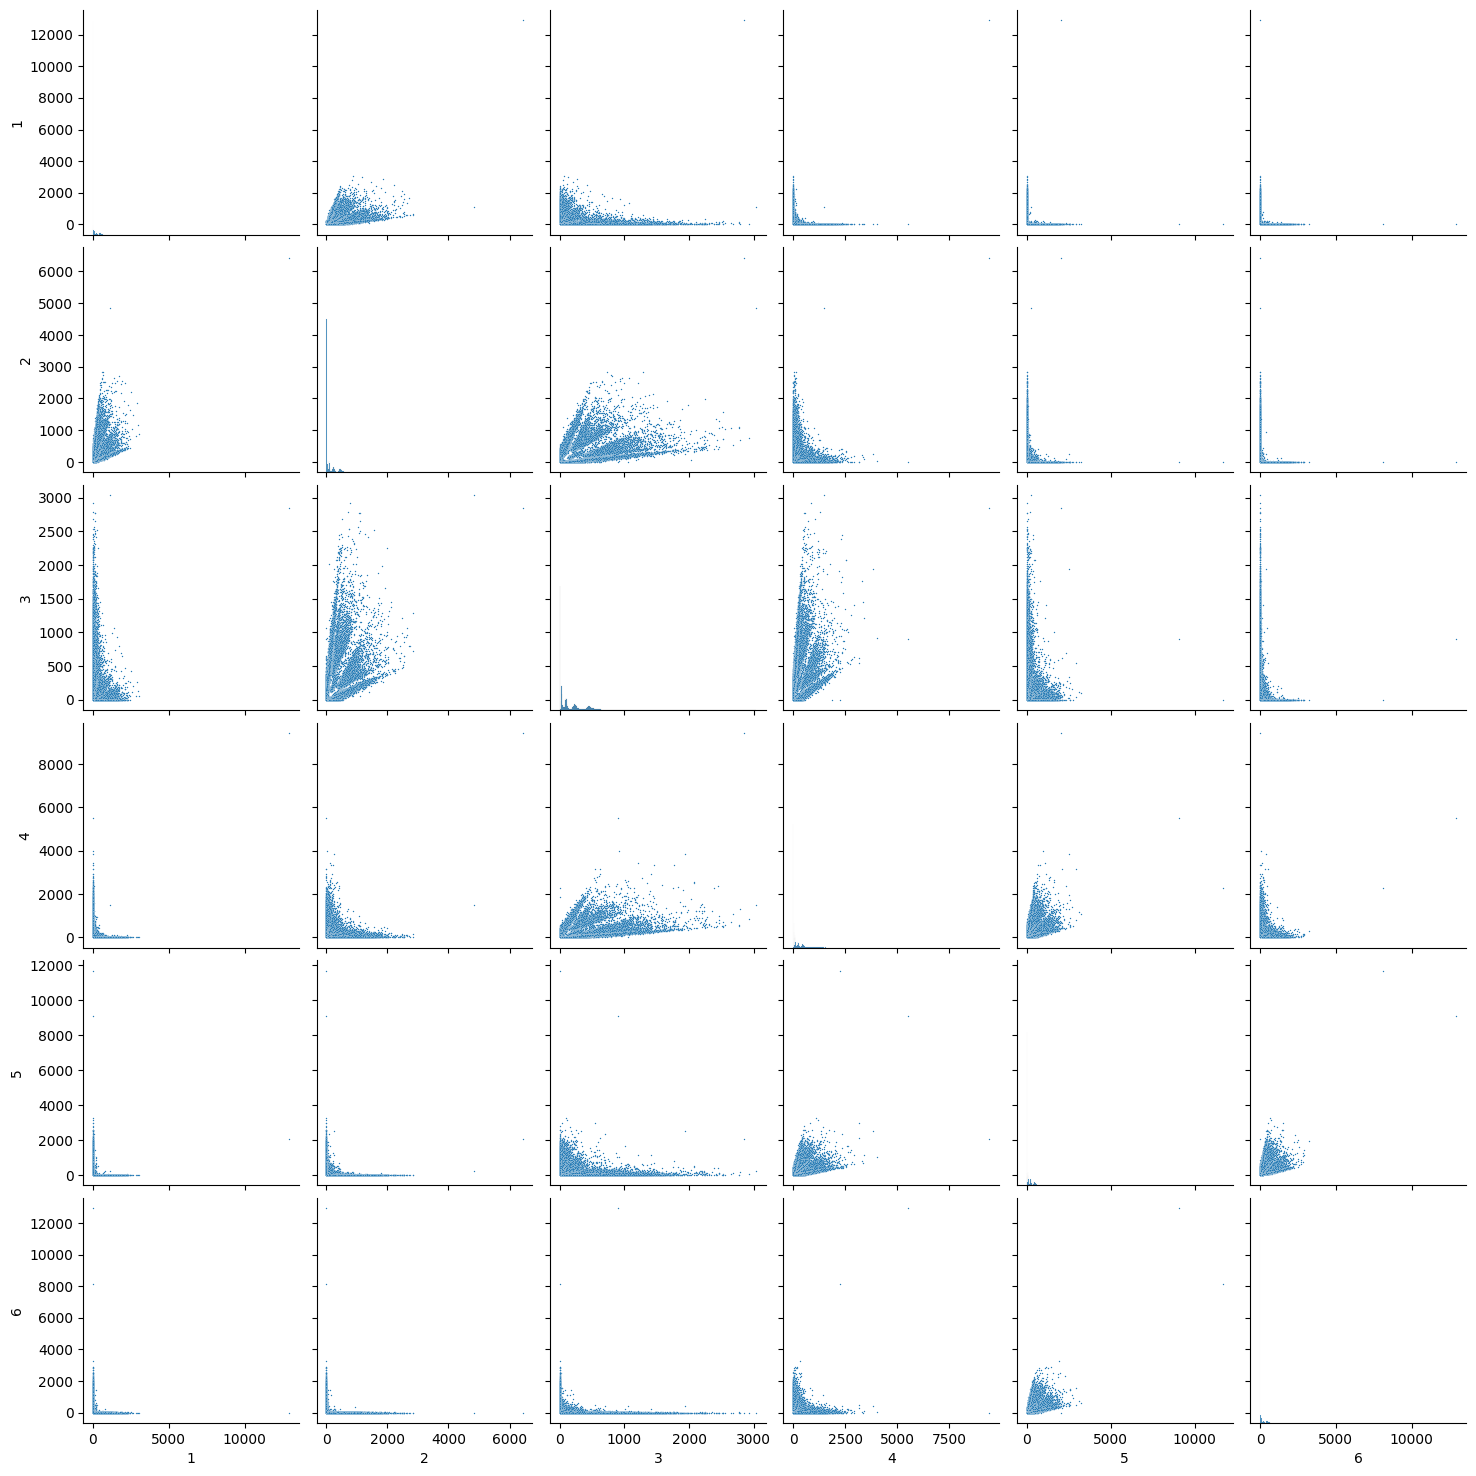

In [2]:
sns.pairplot(X_private, plot_kws={'s': 1})
plt.show()

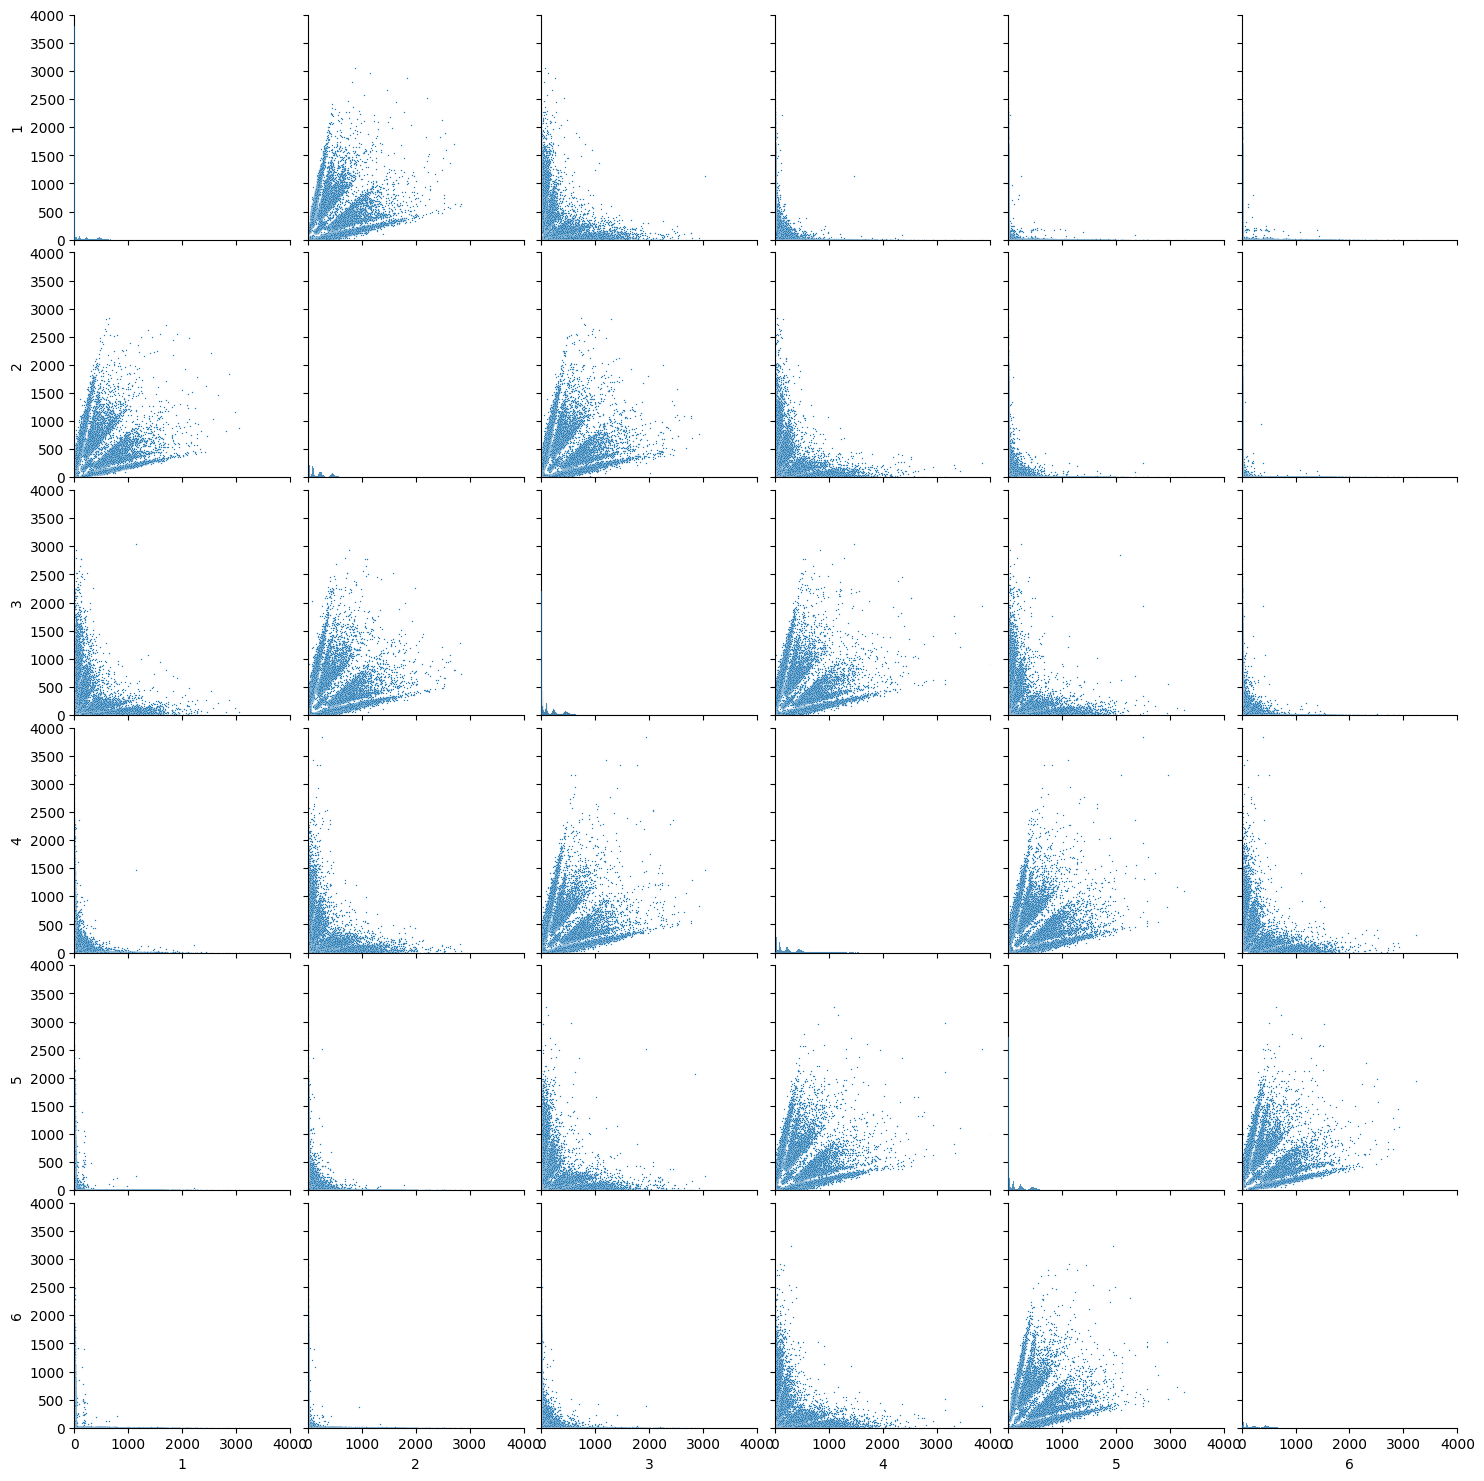

In [3]:
g = sns.pairplot(X_private, plot_kws={'s': 1})
for ax in g.axes.flat:
    ax.set_xlim(0, 4000)
    ax.set_ylim(0, 4000)
plt.show()

In [5]:
X_normalized_public = Normalizer().fit_transform(X_public)

clustering = AgglomerativeClustering(n_clusters=15, linkage="average", metric="cosine")
labels = clustering.fit_predict(X_normalized_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

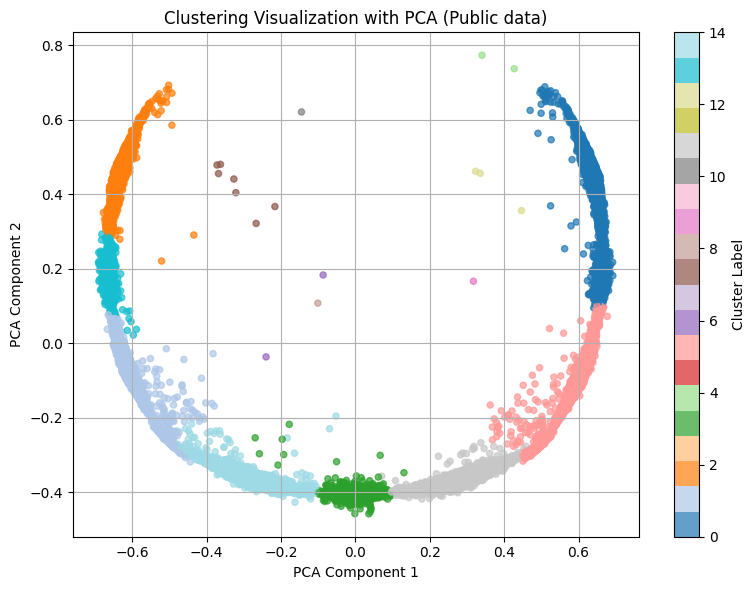

In [6]:
# PCA：將高維資料壓縮成 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized_public)

# 畫出群集結果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab20', s=20, alpha=0.7)
plt.title('Clustering Visualization with PCA (Public data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
X_scaled_private = StandardScaler().fit_transform(X_private)

gmm = GaussianMixture(n_components=23, covariance_type='tied', random_state=42)
labels = gmm.fit_predict(X_scaled_private)

pd.DataFrame({'id': private["id"], 'label': labels}).to_csv('private_submission.csv', index=False)

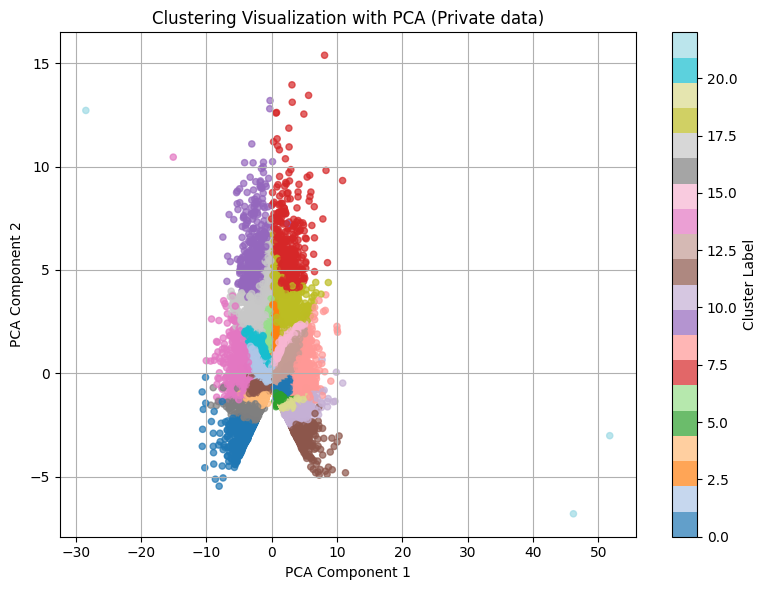

In [8]:
# PCA：將高維資料壓縮成 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_private)

# 畫出群集結果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab20', s=20, alpha=0.7)
plt.title('Clustering Visualization with PCA (Private data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.tight_layout()
plt.show()